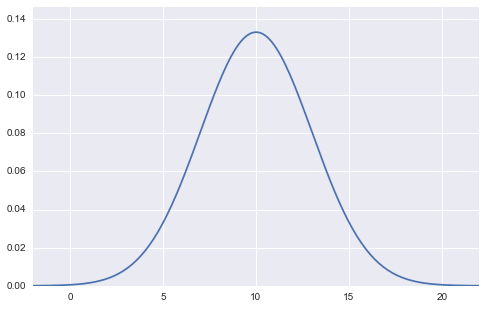

In [151]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import numpy.random as rd

m = 10
s = 3

min_x = m-4*s
max_x = m+4*s

x = np.linspace(min_x, max_x, 201)
y = (1/np.sqrt(2*np.pi*s**2))*np.exp(-0.5*(x-m)**2/s**2)

plt.figure(figsize=(8,5))
plt.xlim(min_x, max_x)
plt.ylim(0,max(y)*1.1)
plt.plot(x,y)
plt.show()

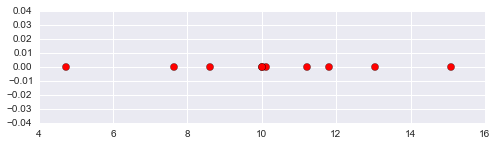

In [106]:

plt.figure(figsize=(8,2))
rd.seed(7)
data = rd.normal(10, 3, 10, )
plt.scatter(data, np.zeros_like(data), c="r", s=50)

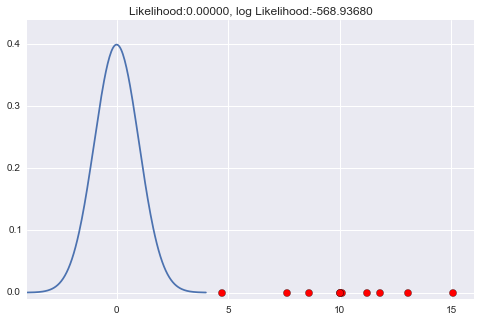

In [107]:
m = 0
s = 1


min_x = m-4*s
max_x = m+4*s

def norm_dens(val):
    return (1/np.sqrt(2*np.pi*s**2))*np.exp(-0.5*(val-m)**2/s**2)
                                      
x = np.linspace(min_x, max_x, 201)
y = norm_dens(x)

L = np.prod([norm_dens(x_i) for x_i in data])
l = np.log(L)

plt.figure(figsize=(8,5))
plt.xlim(min_x, 16)
plt.ylim(-0.01,max(y)*1.1)

# 正規分布の密度関数の描画
plt.plot(x,y)

# データ点の描画
plt.scatter(data, np.zeros_like(data), c="r", s=50)
for d in data:
    plt.plot([d, d], [0, norm_dens(d)], "k--", lw=1)
    
plt.title("Likelihood:{0:.5f}, log Likelihood:{1:.5f}".format(L, l))

plt.show()

-11
21


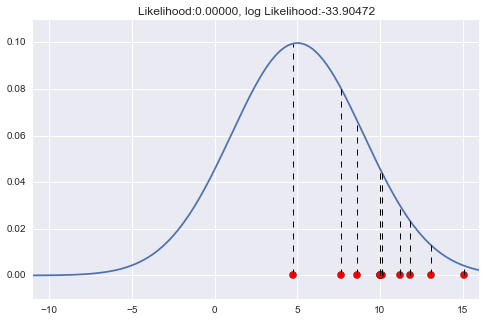

In [108]:


m = 5
s = 4

min_x = m-4*s
max_x = m+4*s

print min_x
print max_x

def norm_dens(val):
    return (1/np.sqrt(2*np.pi*s**2))*np.exp(-0.5*(val-m)**2/s**2)
                                      
x = np.linspace(min_x, max_x, 201)
y = norm_dens(x)

L = np.prod([norm_dens(x_i) for x_i in data])
l = np.log(L)

plt.figure(figsize=(8,5))
plt.xlim(min_x, 16)
plt.ylim(-0.01,max(y)*1.1)

# 正規分布の密度関数の描画
plt.plot(x,y)

# データ点の描画
plt.scatter(data, np.zeros_like(data), c="r", s=50)
for d in data:
    plt.plot([d, d], [0, norm_dens(d)], "k--", lw=1)
    
plt.title("Likelihood:{0:.5f}, log Likelihood:{1:.5f}".format(L, l))

plt.show()

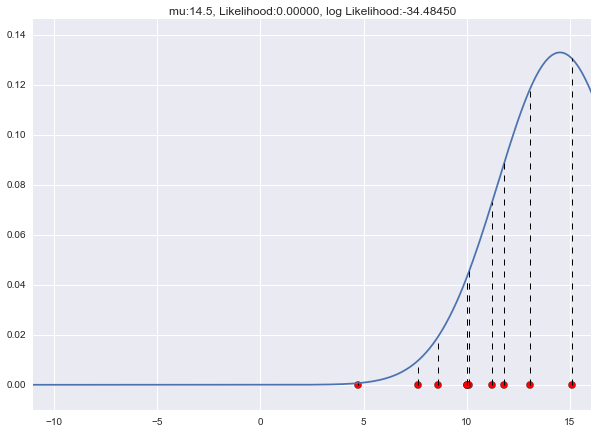

In [109]:
from matplotlib import animation as ani

num_frame = 30

min_x = -11
max_x = 21

x = np.linspace(min_x, max_x, 201)

    
def norm_dens(val, m, s):
    return (1/np.sqrt(2*np.pi*s**2))*np.exp(-0.5*(val-m)**2/s**2)
    
def animate(nframe):
    global num_frame
    plt.clf()
    
    m = nframe/float(num_frame) * 15
    s = 3
    y = norm_dens(x, m, s)
    
    L = np.prod([norm_dens(x_i, m, s) for x_i in data])
    l = np.log(L)

    plt.xlim(min_x, 16)
    plt.ylim(-0.01,max(y)*1.1)

    # 正規分布の密度関数の描画
    plt.plot(x,y)

    # データ点の描画
    plt.scatter(data, np.zeros_like(data), c="r", s=50)
    for d in data:
        plt.plot([d, d], [0, norm_dens(d, m, s)], "k--", lw=1)

    plt.title("mu:{0}, Likelihood:{1:.5f}, log Likelihood:{2:.5f}".format(m, L, l))

    #plt.show()
    
fig = plt.figure(figsize=(10,7))
anim = ani.FuncAnimation(fig, animate, frames=int(num_frame), blit=True)
anim.save('likelihood.gif', writer='imagemagick', fps=1, dpi=64)


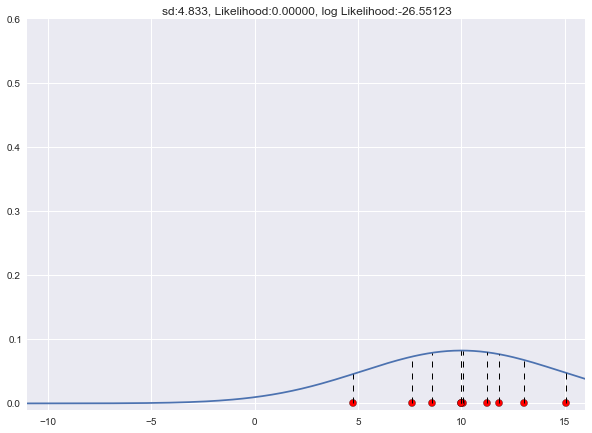

In [110]:


num_frame = 30

min_x = -11
max_x = 21

x = np.linspace(min_x, max_x, 201)
    
def norm_dens(val, m, s):
    return (1/np.sqrt(2*np.pi*s**2))*np.exp(-0.5*(val-m)**2/s**2)
    
def animate(nframe):
    global num_frame
    plt.clf()
    
    m = 10
    s = nframe/float(num_frame) * 5
    y = norm_dens(x, m, s)
    
    L = np.prod([norm_dens(x_i, m, s) for x_i in data])
    l = np.log(L)

    plt.xlim(min_x, 16)
    plt.ylim(-0.01,.6)

    # 正規分布の密度関数の描画
    plt.plot(x,y)

    # データ点の描画
    plt.scatter(data, np.zeros_like(data), c="r", s=50)
    for d in data:
        plt.plot([d, d], [0, norm_dens(d, m, s)], "k--", lw=1)

    plt.title("sd:{0:.3f}, Likelihood:{1:.5f}, log Likelihood:{2:.5f}".format(s, L, l))

    #plt.show()
    
fig = plt.figure(figsize=(10,7))
anim = ani.FuncAnimation(fig, animate, frames=int(num_frame), blit=True)
anim.save('likelihood_s.gif', writer='imagemagick', fps=1, dpi=64)



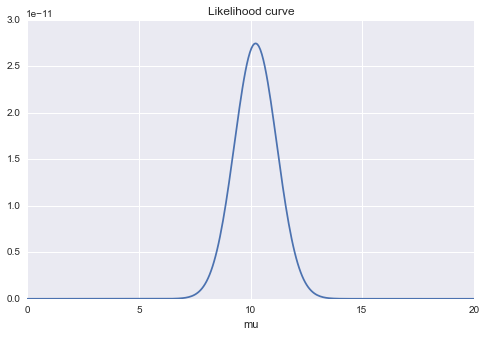

In [155]:
# mを変化させる

list_L = []
s = 3
xx = np.linspace(0, 20,300)
for m in xx:
    list_L.append(np.prod([norm_dens(x_i, m, s) for x_i in data]))
    

plt.figure(figsize=(8,5))
plt.xlim(min(xx), max(xx))
plt.plot(xx, (list_L))
plt.title("Likelihood curve")
plt.xlabel("mu")

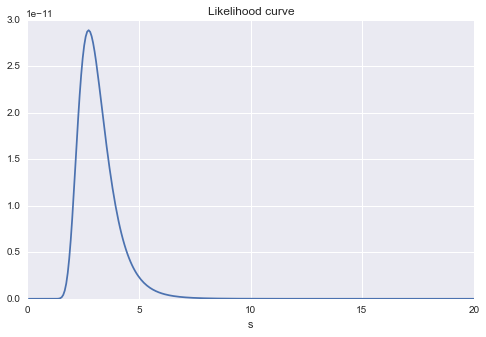

In [156]:
# sを変化させる

list_L = []
m = 10

xx = np.linspace(0, 20,300)
for s in xx:
    list_L.append(np.prod([norm_dens(x_i, m, s) for x_i in data]))
    
plt.figure(figsize=(8,5))
plt.xlim(min(xx), max(xx))
plt.plot(xx, (list_L))
plt.title("Likelihood curve")
plt.xlabel("s")

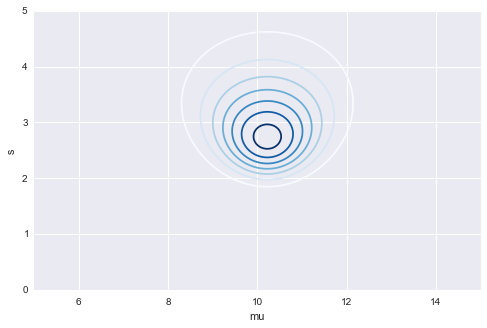

In [157]:
# 等高線

plt.figure(figsize=(8,5))
mu = np.linspace(5, 15, 200)
s = np.linspace(0, 5, 200)
MU, S = np.meshgrid(mu, s)

Z = np.array([(np.prod([norm_dens(x_i, a, b) for x_i in data])) for a, b in zip(MU.flatten(), S.flatten())])
plt.contour(MU, S, Z.reshape(MU.shape), cmap=cm.Blues)
plt.xlabel("mu")
plt.ylabel("s")